## MPU6050  
6-axis Gyro and Accelerometer  

Manufacturer Link:  https://www.invensense.com/products/motion-tracking/6-axis/mpu-6050/

Breakout Board Link:  https://www.sparkfun.com/products/11028

In [1]:
import smbus
import matplotlib.pyplot as plt

from meerkat import mpu6050, parser

In [2]:
dev = mpu6050.mpu6050(bus_n=1, output='json')

#### Configuration

In [3]:
dev.set_gyro_range(dev.GYRO_RANGE_1000DEG)
dev.set_accel_range(dev.ACCEL_RANGE_2G)

#### Measurements

In [4]:
dev.get_temp()

23.73

In [5]:
dev.get_accel()

(38.31680336914062, 36.00879296875, 7.505822204589843)

In [6]:
dev.get_gyro()

(-5.00763358778626, -1.3893129770992367, -2.3587786259541983)

In [7]:
dev.get_all()

[23.635882352941177,
 37.83317463378906,
 36.231453723144526,
 7.558494641113281,
 -5.030534351145038,
 4.572519083969466,
 1.2366412213740459]

In [8]:
dev.get()

['NA',
 1,
 38.08217160644531,
 36.042311791992184,
 7.407659936523437,
 -5.427480916030534,
 0.3511450381679389,
 -1.0076335877862594]

In [9]:
dev.get(description="test_1", n=5)

[['test_1',
  1,
  38.266525134277344,
  35.88190028076172,
  7.481880187988281,
  -5.603053435114504,
  -0.26717557251908397,
  -1.4427480916030535],
 ['test_1',
  2,
  38.29286135253906,
  35.951332128906245,
  7.3549875,
  -5.793893129770993,
  1.8473282442748091,
  -1.1221374045801527],
 ['test_1',
  3,
  38.08935421142578,
  36.12850305175781,
  7.419630944824219,
  -5.396946564885496,
  -0.183206106870229,
  -1.0687022900763359],
 ['test_1',
  4,
  38.03428757324219,
  36.176387084960936,
  7.520187414550781,
  -6.175572519083969,
  -1.5954198473282444,
  -1.2061068702290076],
 ['test_1',
  5,
  38.240188916015626,
  36.1237146484375,
  7.498639599609374,
  -5.732824427480916,
  0.5114503816793893,
  -1.1374045801526718]]

#### JSON Data Publishing

In [10]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [11]:
# writing method with description and sample number
dev.publish(description='test_2', n=5)

['{"description": "test_2", "sample_n": 0, "ax": 38.09414261474609, "ay": 36.15962767333984, "az": 7.381323718261719, "gx": -5.748091603053435, "gy": -0.6030534351145038, "gz": -1.16793893129771, "std_time_ms": "2020-02-16 11:22:42.332035"}',
 '{"description": "test_2", "sample_n": 1, "ax": 38.12766143798828, "ay": 36.169204479980465, "az": 7.532158422851562, "gx": -5.732824427480916, "gy": 0.3435114503816794, "gz": -1.1908396946564885, "std_time_ms": "2020-02-16 11:22:42.347846"}',
 '{"description": null, "sample_n": 2, "ax": 38.046258581542965, "ay": 36.13089725341796, "az": 7.4699091796875, "gx": -5.778625954198473, "gy": -0.6793893129770993, "gz": -1.099236641221374, "std_time_ms": "2020-02-16 11:22:42.362325", "name": "MCP9808", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment"

#### JSON Writer Output

In [12]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [13]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [14]:
dev.json_writer.path

'2020_02_16_11_22_42.jsontxt'

In [15]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "ax": 38.113296228027345, "ay": 36.09019582519531, "az": 7.56567724609375, "gx": -5.702290076335878, "gy": 0.022900763358778626, "gz": -1.2366412213740459, "std_time_ms": "2020-02-16 11:22:42.497328"}
{"description": "test_3", "sample_n": 1, "ax": 38.18272807617187, "ay": 36.06625380859375, "az": 7.513004809570312, "gx": -5.763358778625954, "gy": -0.3893129770992366, "gz": -1.1068702290076335, "std_time_ms": "2020-02-16 11:22:42.514463"}
{"description": null, "sample_n": 2, "ax": 38.15160345458984, "ay": 36.042311791992184, "az": 7.481880187988281, "gx": -5.687022900763359, "gy": -0.2366412213740458, "gz": -1.1755725190839694, "std_time_ms": "2020-02-16 11:22:42.532653", "name": "MCP9808", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "

#### CSV Writer Output

In [16]:
# switch back to CSV format
dev.writer_output = 'csv'

In [17]:
# writer method with description and sample number
dev.write(description='test_4', n=30)

In [18]:
dev.csv_writer.path

'2020_02_16_11_22_43_data.csv'

In [19]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in CSV

In [20]:
m

{'name': 'MPU-6050',
 'title': None,
 'description': None,
 'format': None,
 'encoding': 'utf-8',
 'bytes': None,
 'hash': None,
 'schema': None,
 'sources': None,
 'licenses': None,
 'line_terminator': '\n',
 'quote_char': '"',
 'double_quote': True,
 'escape_char': '\\',
 'null_sequence': 'NA',
 'comment': '#',
 'skip_lines': 1,
 'path': '2020_02_16_11_22_43_data.csv',
 'device': {'name': 'MPU-6050',
  'version_hw': '0.1',
  'version_sw': '0.1',
  'accuracy': None,
  'precision': None,
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0xad043630>',
  'state': None,
  'active': None,
  'error': None,
  'dtype': None,
  'description': 'TDK InvenSense Gyro & Accelerometer',
  'urls': 'https://www.invensense.com/products/motion-tracking/6-axis/mpu-6050/',
  'manufacturer': 'TDK',
  'gyro_accuracy': '+/-3%, +/-2% cross axis',
  'gyro_precision': '16bit',
  'gyro_noise': '0.05 deg/s-rms',
  'accel_accuracy': '+/-0.5%, +/-2 cross axis',
  'accel_precision': '16bit',
  'accel_noise': 'PSD 400 ug /

#### Parsed CSV data

In [21]:
df.head()

,std_time_ms,description,sample_n,ax,ay,az,gx,gy,gz,datetime64_ns
0,2020-02-16 11:22:43.085860,test_4,0,38.165969,36.116532,7.453150,-5.778626,-0.007634,-1.183206,2020-02-16 11:22:43.085860
1,2020-02-16 11:22:43.106693,test_4,1,38.118085,36.068648,7.445967,-5.770992,0.045802,-1.076336,2020-02-16 11:22:43.106693
2,2020-02-16 11:22:43.122480,test_4,2,38.142027,36.126109,7.493851,-5.755725,-0.091603,-1.152672,2020-02-16 11:22:43.122480
3,2020-02-16 11:22:43.138725,test_4,3,38.146815,36.157233,7.450756,-5.755725,0.045802,-1.160305,2020-02-16 11:22:43.138725
4,2020-02-16 11:22:43.153926,test_4,4,38.163574,36.173993,7.496245,-5.763359,-0.343511,-1.221374,2020-02-16 11:22:43.153926


In [22]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

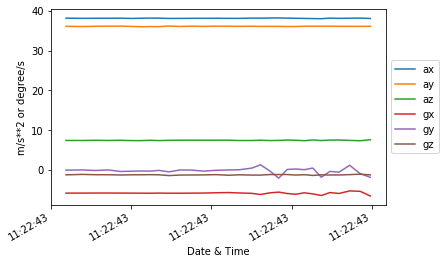

In [23]:
df[['datetime64_ns', 
    'ax', 'ay', 'az', 
    'gx', 'gy', 'gz']].plot(x='datetime64_ns');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Date & Time');
plt.ylabel('m/s**2 or degree/s');